# Popular Data Science Questions

Stack Exchange sites hosts questions on different subjects and fields such as mathematics, physics, philosophy and data science. questions posted on the sites have a reputation reward system where good questions or answers are easily indentifiable by upvotes while those questions that are not as important get downvotes. 

This project will help content writers for a data science Stack Exchange site determine What is it that people want to learn about in data science. Some reputable Stack Excahnge sites relevant to data science are Stack Overflow, Stack Exchange, Ask Ubuntu and Mathematics. 

Data Science Stack Exchange (DSSE) is dedicated to data science and has a lot of unanswered questions. The site will be the focus of the project.

# Information on Data Science Stack Exchange 

On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking) , we can read that we should:

* Avoid subjective questions.
* Ask practical questions about Data Science — there are adequate sites   for theoretical questions.
* Ask specific questions.
* Make questions relevant to others.

Aditional guidelines to asking relevant questions relating can be found here as well

* For data requests [Open Data](https://opendata.stackexchange.com/help/on-topic)
* For software packages and algorithmns in applied mathematics [Computational science](https://scicomp.stackexchange.com/help/on-topic)

From the homepage of DSSE there are four sections for classifying questions

* [Questions](https://datascience.stackexchange.com/questions) list of questions asked
* [Tags](https://datascience.stackexchange.com/tags) list of tags that categories questions. Tags belong to different topic categories such as machine learning, python, neural network, deep-learning, scikit-learn, tensorflow and others.
* [Users](https://datascience.stackexchange.com/users) a list of users
* [Unanswered](https://datascience.stackexchange.com/unanswered) list of unanswered questions

The tagging system will be useful to quantify the questions answered for a given section. Moderation by the community also will be reliable in drawing conclusions using the tagging system. 

Information for each post has the following:

* For both questions and answers:
 * The posts's score;
 * The posts's title;
 * The posts's author;
 * The posts's body;
* For questions only:
 * How many users have it on their "
 * The last time the question as active;
 * How many times the question was viewed;
 * Related questions;
 * The question's tags;

 # Stack Exchange Data Explorer

Some of the tables in the data explorer are relevant to the project. Those tables include the following:

* Posts
* PostTags
* Tags
* TagSynonyms

Running some queries on the tags table give good results showing questions posted for each tag category however, how recent the posts were made is unknown. 

For this purpose the posts table will be more relevant for the project than the tag table. The tag table look like the following at this [link](https://data.stackexchange.com/datascience/query/edit/1203637#resultSets) when the following query is run 

    SELECT * FROM tags;

Running the following query will give the posts table below of relevant data for the project with the date of each post as of 2019. The table can be viewed [here](https://data.stackexchange.com/datascience/query/edit/1203637#resultSets).

    SELECT Id, CreationDate,
        Score, ViewCount, Tags,
        AnswerCount, FavoriteCount
    FROM posts
    WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
 


# Data Exploration

The CreationDate column would be parsed as a datetime object when reading the dataset

In [1]:
# Importing the needed classes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv('2019_questions.csv', parse_dates = ["CreationDate"])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


There are no missing values for the columns except for the FavoriteCount column. A questions without a favorite count means that that question was not in any users' favorites list and can be filled with a zero. 

The datatypes for all of the columns are appropriate except for the Tags column and the favoriteCount column. Since the FavoriteCount has zeros it would be appropriate to change the column type to an int. 

Exploring the datatype of each entry of the Tags column the dataype of each is a string. Questions can each have their tags put in list and can be kept the way they are instead of creating different columns for each tag.

In [4]:
questions['Tags'].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

# Cleaning The Data

Fixing the FavoriteCount column

In [5]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [6]:
# Converting the Tag column string into a list

questions['Tags'] = questions['Tags'].str.replace('^<|>$', '').str.split('><')
questions.head(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0


# Most Used and Most Viewed Tags

In [7]:
# Counting the number of times each tag was used

tag_count = dict()

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [8]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(5)

,Count
word-embeddings,117
arima,11
bias,19
hurdle-model,1
siamese,1


Sorting the tag count to identify the top tags that were used

In [9]:
most_used = tag_count.sort_values(ascending=False, by="Count").head(20)
most_used

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


A threshold of 20 for the top tags another threshold could have been used. A decresing trend is observed with the tag counts so there is no spikes in the tag count numbers which would have posed a problem. A plot of the tag counts is below 

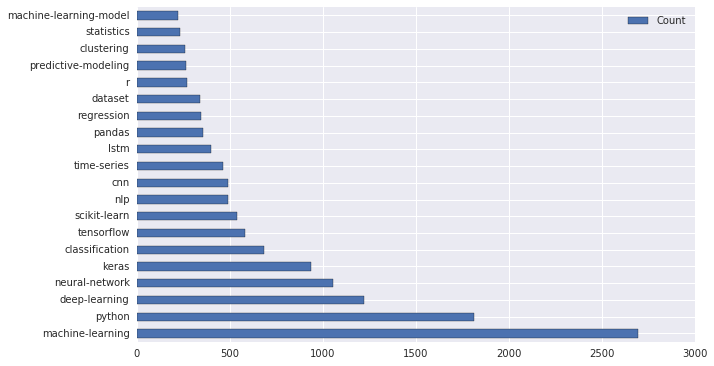

In [10]:
most_used.plot(kind='barh', figsize=(10,6))

Some tags are ambiguous and may be left out of the analysis for example python, r and dataset. Next the number of times each tag was viewed with the plot of the values is below. 

In [11]:
tag_view_count = dict()

for idx, tags in enumerate(questions['Tags']):
    for tag in tags:
        if tag in tag_view_count:
            tag_view_count[tag] += questions['ViewCount'].iloc[idx]
        else:
            tag_view_count[tag] = 1
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)
tag_view_count.head(5)            

,ViewCount
word-embeddings,18616
arima,871
bias,2931
hurdle-model,1
siamese,1


Sorting the tags according to the top views

In [12]:
most_viewed = tag_view_count.sort_values(ascending=False, by='ViewCount').head(20)
most_viewed

,ViewCount
python,535935
machine-learning,388479
keras,268025
deep-learning,233045
pandas,200576
neural-network,185342
scikit-learn,128056
tensorflow,119560
classification,104397
dataframe,89281


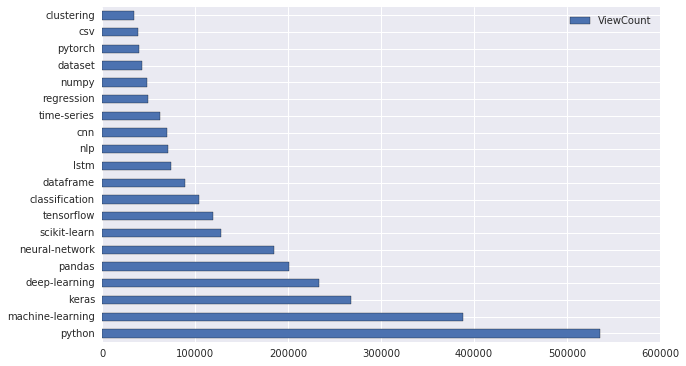

In [13]:
most_viewed.plot(kind='barh', figsize=(10,6))

A view of both plots side by side for comparison

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f686d07c748>],
      dtype=object)

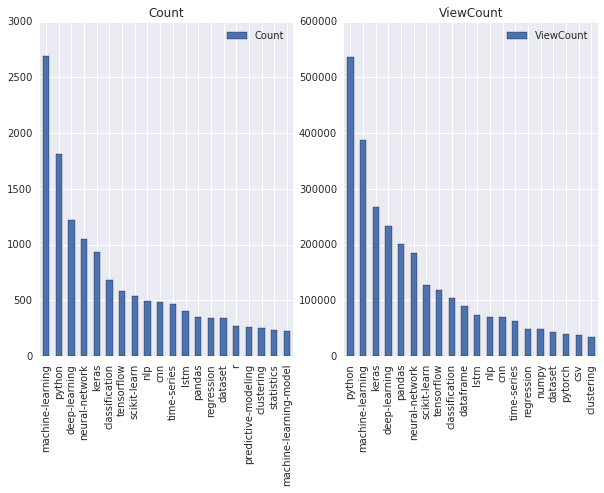

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((10, 6))
most_used.plot(kind="bar", ax=axes[0], subplots=True, rot=90)
most_viewed.plot(kind="bar", ax=axes[1], subplots=True, rot=90)

The most used tag was machine-learning while the most viewed tag was python. As much as python might not be useful because it is broad it might be a good idea to explore the relationship between the most used tag machine-learning and python to find the kind of questions users typically posted or viewed using both tags.

Tags from the most used and the most viewed appear in both plots. The datafrmes below show what tags were used in the most used but are missing in the most viewed dataframe and vice versa.  

In [15]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

In [16]:
in_used

,Count,ViewCount
machine-learning,2693,388479.0
python,1814,535935.0
deep-learning,1220,233045.0
neural-network,1055,185342.0
keras,935,268025.0
classification,685,104397.0
tensorflow,584,119560.0
scikit-learn,540,128056.0
nlp,493,71278.0
cnn,489,69766.0


In [17]:
in_viewed

,Count,ViewCount
python,1814.0,535935
machine-learning,2693.0,388479
keras,935.0,268025
deep-learning,1220.0,233045
pandas,354.0,200576
neural-network,1055.0,185342
scikit-learn,540.0,128056
tensorflow,584.0,119560
classification,685.0,104397
dataframe,NaN,89281


# Relation Between Tags

To find the relationship between the tags that are popular i.e for both the most viewed and the most viewed the number of times tags appear in a list for a given question can be counted. 

The top 10 popular tags will be paired and the number of times a given pair appears in a tag list will be stored in a dataframe. The top ten tags are 
python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn

Below is the dataframe and number counts of paired tag counts

In [18]:
# creating the dataframe

top_tags = list(tag_count.index)
paired_tags = pd.DataFrame(index = top_tags, columns = top_tags)
paired_tags.iloc[0:4,0:4]

,word-embeddings,arima,bias,hurdle-model
word-embeddings,NaN,NaN,NaN,NaN
arima,NaN,NaN,NaN,NaN
bias,NaN,NaN,NaN,NaN
hurdle-model,NaN,NaN,NaN,NaN


Populating the dataframe with all zeros. Afterwards pared tags counts will be incremented starting from one until all paired tags used together in the questions dataset are counted. 

In [19]:
paired_tags.fillna(0, inplace=True)
# paired_tags
for tag in questions['Tags']:
    paired_tags.loc[tag, tag] += 1
paired_tags.iloc[0:4,0:4]

,word-embeddings,arima,bias,hurdle-model
word-embeddings,117,0,1,0
arima,0,11,0,0
bias,1,0,19,0
hurdle-model,0,0,0,1


The dataframe is too huge. Since the analysis is focused on the most used tags that are not in the top 20 tags will be filtered out. 

In [20]:
most_paired_tags = paired_tags.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

most_paired_tags.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


The blue values are the count for each tag used. Machine learning has 2693 as observed before. The r and time-series tags are used 22 times. For a better understanding of the dataframe results a heatmap can be used to visualize the data. The data in blue will be removed to avoid the colors from being skewed.

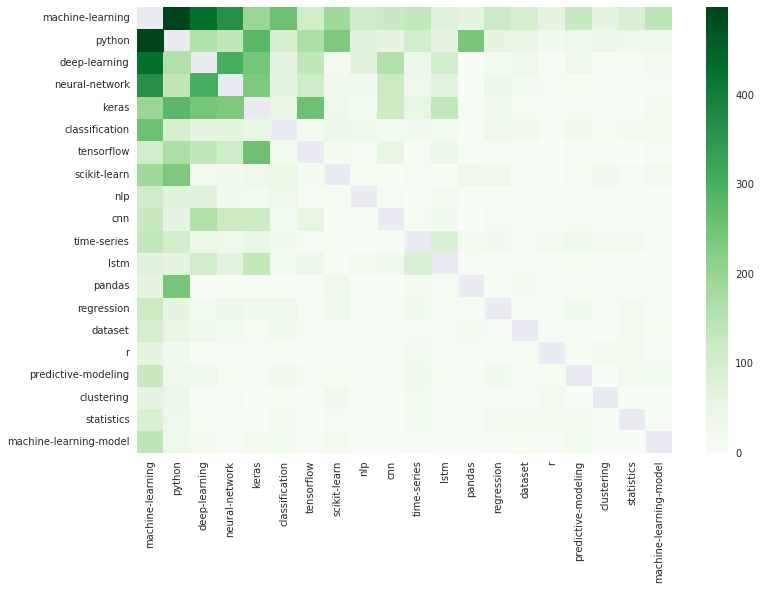

In [21]:
for i in range(most_paired_tags.shape[0]):
    most_paired_tags.iloc[i,i] = pd.np.NaN
    
plt.figure(figsize=(12,8))
sns.heatmap(most_paired_tags, cmap="Greens", annot=False)

From the heat plot it is noticable that python and machine learning have a strong relationship. This could be because both tags are commonly used in each question tag. The heat map's color becomes thicker around the top left corner of the plot indicating that the machine learning and python tags could have relationships with other tags as well like deep-learning, keras and neural networks.

Despite the fact that the python and machine learning tags are strongly related their relationship could be investigated. They both could just be popular tags that happen to appear in question tags several times throught the dataset.

Association rules could help to establish their dependence or independence to know if they are truly related or they just coexsists in question tags. An example to this effect is the relationship of toilet paper and bread being more independent in a grocery basket than milk and eggs. 

# Is deep learning just a fad?

Before making recomendations about using the top popoular tags on data science for content creators to post their questions the content that would be geberated will only be relevant if data science topics remain relevant in the log run. One of these is in deep learning. It will be interesting to know if interest in deep learning will slow down.

The DSSE provides data information about all questions ever asked about deep learning. The dataset from the DSSE and the analysis of the results are below.

In [22]:
# Reading and cleaning the dataset

all_q = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [23]:
# Cleaning the tag column

all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

To determine which questions in the dataset are deep learning questions first the questions that have deep learning tags should be indentified. From the top used tags related to deep learning after some research online the following tags belong to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

A new column in the dataset using the following code below will give 1 to a column that has one of the tags in the above list and 0 otherwise.

In [24]:
def class_deep_learning(tags):
    tag_list = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]
    for tag in tags:
        if tag in tag_list:
            return 1
    return 0

In [25]:

all_q['DeepLearning'] = all_q['Tags'].apply(class_deep_learning)

In [26]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
20687,66061,2020-01-07 23:46:20,[tensorflow],1
13670,10144,2016-02-08 19:55:06,"[time-series, markov-process, reference-request]",0
8128,49023,2019-04-10 07:27:26,"[machine-learning, python, deep-learning, scik...",1
4567,4935,2015-01-24 15:15:27,[apache-hadoop],0
4735,26588,2018-01-13 08:27:47,"[dataset, data, version-control]",0


Now that the deep learning questions have been filtered the interest in deep learning would be monitored across a given timeframe. A quaterly timeframe will be appropriate since data science questions are not as dynamic to keep track of their changes in a smaller time period such as days, weeks, or months.

Since the data for the first quater of 2020 is unavailable 2020 data will be removed.

In [27]:
all_q = all_q[all_q['CreationDate'].dt.year < 2020]

In [31]:
# Function to determine what quater a date is in

def determine_quarter(date):
    year = str(date.year)[2:]
    quarter = str((date.month // 3) + 1)
    return '{y}QT{q}'.format(y = year, q= quarter)

all_q['Quarter'] = all_q['CreationDate'].apply(determine_quarter)

In [32]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19QT1
1,45418,2019-02-12 00:50:39,[neural-network],1,19QT1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19QT1
3,45426,2019-02-12 04:51:49,[keras],1,19QT1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19QT1


Before visualizing the information for each time period the dataframe will be grouped by quarter to show the following

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [33]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"] / quarterly["TotalQuestions"]

In [34]:
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
8,15QT5,39,150,0.260000
17,17QT4,272,771,0.352789
1,14QT3,19,240,0.079167
18,17QT5,142,322,0.440994
27,19QT4,787,2031,0.387494


The plot of each quarter's DeepLearningRate and TotalQuestions is below

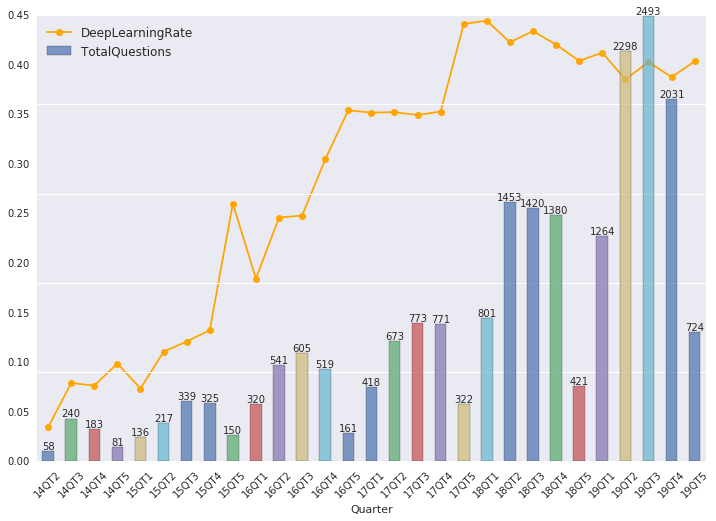

In [57]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(12,8)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarterly["TotalQuestions"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

From the plot there is an overall increase in the DeepLearningRate ever since the DSSE was created. It reached its plateux in the second quarter of 2018 and remained relatively stable. There is no indication of a decreasing trend in deep learning questions. 

Deep learning questions or questions related to deep learning such as machine learning and neural networks based on the above results are good tags to consider for the content writers to generate questions. Python related questions using these tags also should be considered as well. 

Further exploration can find not so popular tags related to those that popular to generate questions. Other popularity features can be added in future analysis such as scores and favorite counts for posted questions. Non data science questions could also be explored such as the mathematical field from other sites to know what other kinds of questions are asked in other popular fields. 